#### 11608714  and 11892641

This assignment is divided into two parts. The first part of this assignment will consist of running various regression models and in the second part two classification tasks will be performed. 

We will be running three regression analysis: 

1. An ordinary least squares linear regression model 
2. A ridge regression model 
3. A lasso regresssion model 

For the classification analysis we will be creating two models: 

1. A KNN model 
2. A linear SVM model using the default parameters 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

### Part 1
#### 1.1 Importing and Loading the Data

In [2]:
data="/Users/sofiagarfias/Downloads/machine-learning_assignment-i/data.csv"
df=pd.read_csv(data)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
time1           10000 non-null float64
time2           10000 non-null float64
time3           10000 non-null float64
time4           10000 non-null float64
p2              10000 non-null float64
p3              10000 non-null float64
p4              10000 non-null float64
pe1             10000 non-null float64
pe2             10000 non-null float64
pe3             10000 non-null float64
pe4             10000 non-null float64
satisfaction    10000 non-null float64
dtypes: float64(12)
memory usage: 937.6 KB


In [4]:
df.describe()

,time1,time2,time3,time4,p2,p3,p4,pe1,pe2,pe3,pe4,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


Satisfaction is our target variable and will have to be removed from our testing dataset. 

We will be creating two datasets: 1 for training, 1 for testing 

### Part 2
### 2.1 Importing Packages 

In [5]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
train=df.loc[:,"time1":"pe4"]
test=df.iloc[:,-1]

In [8]:
from sklearn.utils import shuffle
X, y = train, test
X, y = shuffle(X, y, random_state=43)


In [9]:
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### 2.1.1 Ordinary Least Squares

Preforming Linear Regression. 

We will report the mean squared error and the R2 coefficient of determination.

In [11]:
lr=LinearRegression().fit(X_train,y_train)

In [12]:
train_score=lr.score(X_train,y_train)
test_score=lr.score(X_test,y_test)

In [13]:
print("The training set score(r2) is:",train_score)
print("The testing set score(r2) is", test_score)

The training set score(r2) is: 0.6407134111667169
The testing set score(r2) is 0.6649860137597698


In [14]:
from sklearn.metrics import mean_squared_error
y_predict=lr.predict(X_test)
lr_mse=mean_squared_error(y_test,y_predict)
print("The MSE is: ",lr_mse)

The MSE is:  0.0004646619390810551


### 2.1.2 Ridge Regression 

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 14)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score = True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [16]:
print("The best parameter is:", grid.best_params_)
print("The best model score is:", grid.best_score_)

The best parameter is: {'alpha': 0.5878016072274912}
The best model score is: 0.638337673707356


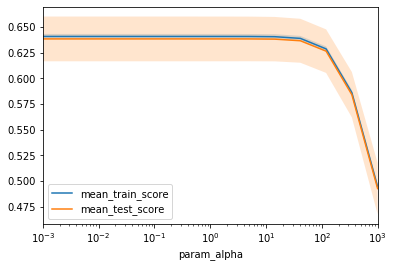

In [17]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [18]:
param_grid = {'alpha': np.logspace(-7, 0, 14)}
grid = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score = True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-07, 3.45510729e-07, 1.19377664e-06, 4.12462638e-06,
       1.42510267e-05, 4.92388263e-05, 1.70125428e-04, 5.87801607e-04,
       2.03091762e-03, 7.01703829e-03, 2.42446202e-02, 8.37677640e-02,
       2.89426612e-01, 1.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [19]:
print("The best parameter is:",grid.best_params_)
print("The best model socre is:",grid.best_score_)

The best parameter is: {'alpha': 1.4251026703029963e-05}
The best model socre is: 0.6383524959225224


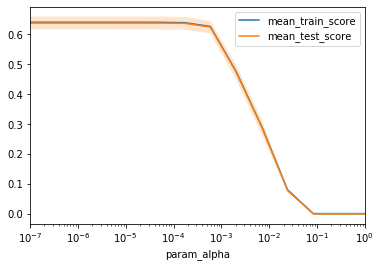

In [20]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

### Part 3
### Loading libraries and packages

In [21]:
from sklearn.datasets import make_blobs
from matplotlib import colors
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

### 3.1.1 KNN 

In [22]:
df_copy = df

def check_a(d):
    if d >= 0:
        return 1
    else:
        return 0
    
df_copy['satisfaction_binary'] = df_copy['satisfaction'].apply(check_a)

del df_copy['satisfaction']

In [23]:
train=df.loc[:,"time1":"pe4"]
test=df.iloc[:,-1]
X, y = train, test
X, y = shuffle(X, y,random_state=43)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
param_grid = {'n_neighbors':  np.arange(1, 30, 1)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10, return_train_score = True)
grid.fit(X_train, y_train)
print("best cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))


best cross-validation score: 0.800
best parameters: {'n_neighbors': 20}
test-set score: 0.802


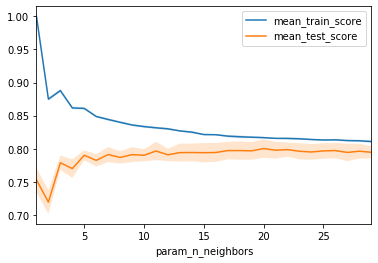

In [25]:
results = pd.DataFrame(grid.cv_results_)

results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

### 3.1.2 SVM

In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report

linear_svm = LinearSVC(C=1,max_iter=10000).fit(X_train, y_train)
print("Coefficients: ", linear_svm.coef_) 
print("Intercept: ", linear_svm.intercept_)
test_score=linear_svm.score(X_test,y_test)
print("test_score: ",test_score)

y_pred = linear_svm.predict(X_test)
print(classification_report(y_test, y_pred))

Coefficients:  [[ 0.11023071  0.10674583  0.11143418  0.11315006  0.00232358  0.01134461
  -0.0267624   0.90895735  0.98517301  1.07829727  0.97625059]]
Intercept:  [-4.03822097]
test_score:  0.816
              precision    recall  f1-score   support

           0       0.78      0.69      0.74       921
           1       0.83      0.89      0.86      1579

    accuracy                           0.82      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.81      0.82      0.81      2500

